<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/multi_ticker_deep_sarsa_walkforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0 --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 89.9/89.9 kB 6.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.2/42.2 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pypro

In [ ]:

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 172.2/172.2 kB 6.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 109.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 87.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 64.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [ ]:
# ‚úÖ Clean install of TensorFlow compatible with Colab's GPU (CUDA 11.8 + cuDNN 8.x)
!pip install tensorflow==2.12.0

# ‚ö†Ô∏è Restart runtime after this!
!pip install numpy==1.24.4 --force-reinstall

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 586.0/586.0 MB 1.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.0/2.0 MB 90.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.7/1.7 MB 87.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.1/17.1 MB 115.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.3/17.3 MB 114.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
cudf-polars-cu12 25.2.2 requires pylibcudf-cu12==25.2.*, but you have pylibcudf-cu12 24.12.0 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
flax 0.

In [ ]:
import torch
import cudf
import cuml
import dask
import pandas as pd
import numpy as np
import scipy
import lightgbm as lgb
import gymnasium as gym
import stable_baselines3

#=========================
#Version Checks
#=========================
print(" Library Versions")
print("--------------------")
print(" PyTorch:", torch.__version__)
print(" CUDA:", torch.version.cuda)
print(" cuDF:", cudf.__version__)
print(" cuML:", cuml.__version__)
print(" Dask:", dask.__version__)
print(" Pandas:", pd.__version__)
print(" NumPy:", np.__version__)
print(" SciPy:", scipy.__version__)
print(" LightGBM:", lgb.__version__)
print(" Gymnasium:", gym.__version__)
print(" Stable Baselines3:", stable_baselines3.__version__)

#=========================
# GPU Check (Torch + NVIDIA)
#=========================
print("\n GPU Availability")
print("--------------------")
print(" PyTorch GPU Available:", torch.cuda.is_available())
print(" GPU Count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print(" GPU Name:", torch.cuda.get_device_name(0))

 Library Versions
--------------------
 PyTorch: 2.6.0+cu124
 CUDA: 12.4
 cuDF: 24.12.00
 cuML: 24.12.00
 Dask: 2024.11.2
 Pandas: 2.2.3
 NumPy: 1.24.4
 SciPy: 1.15.2
 LightGBM: 4.5.0
 Gymnasium: 1.1.1
 Stable Baselines3: 2.6.0

 GPU Availability
--------------------
 PyTorch GPU Available: True
 GPU Count: 1
 GPU Name: Tesla T4


In [ ]:
# ‚úÖ Clean install of TensorFlow compatible with Colab's GPU (CUDA 11.8 + cuDNN 8.x)
!pip uninstall -y tensorflow keras
!pip install tensorflow==2.12.0

# ‚ö†Ô∏è Restart runtime after this!
!pip install numpy==1.24.4 --force-reinstall

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Successfully uninstalled keras-2.12.0
  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (586.0 MB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the pack

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
cudf-polars-cu12 25.2.2 requires pylibcudf-cu12==25.2.*, but you have pylibcudf-cu12 24.12.0 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have ri

In [ ]:
# ‚úÖ Core & System Utilities
import os
import gc
import sys
import time
import json
import pickle
import random
from datetime import datetime
from collections import defaultdict, deque

# ‚úÖ Data Science Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numba

# ‚úÖ Financial Data
import yfinance as yf

# ‚úÖ Machine Learning & Preprocessing
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix
)

# ‚úÖ Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import Input, backend as K
from tensorflow.keras import mixed_precision

# ‚úÖ Visualization & Display
import IPython.display as display

# ‚úÖ RAPIDS Libraries (for GPU-accelerated ML, optional)
import cupy as cp

# ‚úÖ Reinforcement Learning (Stable Baselines3)
import stable_baselines3
from stable_baselines3 import A2C, DDPG, DQN, PPO, SAC, TD3
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

# ‚úÖ Gym & Trading Environments
import gym
import gymnasium as gym
import gym_anytrading
from gym.spaces import Box
from gymnasium.spaces import Box as GymBox, Discrete
from gymnasium.wrappers import TimeLimit

# ‚úÖ CUDA (Optional Paths - for manual GPU configuration)
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

# ‚úÖ GPU Check (Colab only)
!nvidia-smi


Mon Apr 21 01:19:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Required for TensorFlow compatibility (GPU + cuDNN)
!pip uninstall -y tensorflow keras -q
!pip install tensorflow==2.12.0 -q

# Fix protobuf compatibility
!pip install protobuf==3.20.3 -q

# Essential packages
!pip install numpy==1.24.4 pandas joblib yfinance scikit-learn matplotlib -q


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 1.23.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
cudf-polars-cu12 25.2.2 requires pylibcudf-cu12==25.2.*, but you have pylibcudf-cu12 24.12.0 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
flax 0.10.5 requires jax>=0.5.1, but you ha

In [ ]:
import os
from google.colab import drive

if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')
else:
    print("‚úÖ Google Drive is already mounted.")



Mounted at /content/drive


In [ ]:
# ‚úÖ Downgrade NumPy to a compatible version
!pip install numpy==1.24.4 --force-reinstall

# ‚úÖ Reinstall LightGBM after fixing NumPy
!pip install lightgbm --force-reinstall --no-cache-dir


  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
cudf-polars-cu12 25.2.2 requires pylibcudf-cu12==25.2.*, but you have pylibcudf-cu12 24.12.0 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have ri

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 20.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 206.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.6/3.6 MB 92.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.4/16.4 MB 49.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37.6/37.6 MB 41.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: scipy
    Found existing insta

In [ ]:
!pip install -U scikit-learn==1.3.2 --quiet


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.9/10.9 MB 76.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.3/18.3 MB 76.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
cudf-polars-cu12 25.2.2 requires pylibcudf-cu12=

In [ ]:
!pip install yfinance

In [1]:
# ‚úÖ Imports
import os, gc, random
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from datetime import datetime

# ‚úÖ Config
TICKERS = ["AAPL", "TSLA", "MSFT", "GOOG", "AMZN", "NVDA", "META", "JPM", "BAC", "WMT",
               "UNH", "V", "PG", "HD", "MA", "DIS", "PEP", "KO", "CSCO", "ADBE", "CRM", "NFLX",
               "PFE", "MRK", "T", "ORCL", "ABBV", "CVX", "XOM", "ABT", "COST", "QCOM", "INTC",
               "MCD", "NKE", "DHR", "LLY", "MDT", "TMO", "TXN", "PM", "AVGO", "NEE", "ACN", "UPS",
               "HON", "LIN", "GS", "IBM"]

SEQUENCE_LENGTH = 60
SAVE_DIR = "/content/drive/MyDrive/DeepSARSA_Models"
os.makedirs(SAVE_DIR, exist_ok=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ‚úÖ Feature Engineering
def compute_technical_indicators(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))
    df['MACD'] = df['Close'].ewm(span=12, adjust=False).mean() - df['Close'].ewm(span=26, adjust=False).mean()
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['ATR'] = df['High'].rolling(window=14).max() - df['Low'].rolling(window=14).min()
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()
    df.dropna(inplace=True)
    return df

# ‚úÖ Deep SARSA Model
class DQNNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNNet, self).__init__()
        self.lstm = nn.LSTM(input_dim, 64, batch_first=True)
        self.fc1 = nn.Linear(64, 32)
        self.out = nn.Linear(32, output_dim)

    def forward(self, x):
        h, _ = self.lstm(x)
        h = h[:, -1, :]  # last hidden state
        x = torch.relu(self.fc1(h))
        return self.out(x)

class DeepSARSAAgent:
    def __init__(self, input_dim, action_dim, lr=1e-3, gamma=0.99):
        self.gamma = gamma
        self.model = DQNNet(input_dim, action_dim).to(device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.criterion = nn.MSELoss()

    def select_action(self, state, epsilon):
        if random.random() < epsilon:
            return random.randint(0, 2)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()

    def update(self, state, action, reward, next_state, next_action, done):
        q_values = self.model(state)
        next_q_values = self.model(next_state)
        target = reward + self.gamma * next_q_values[0, next_action] * (1 - int(done))
        loss = self.criterion(q_values[0, action], target.detach())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

# ‚úÖ Training Loop
def train_agent_on_stock(ticker, episodes=10):
    print(f"\nüîÅ Training Deep SARSA on {ticker}")
    df = yf.download(ticker, period="720d", interval="1h", progress=False)
    if df.empty:
        print(f"‚ö†Ô∏è No data for {ticker}, skipping.")
        return

    df = compute_technical_indicators(df)
    features = ['Close', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'Signal_Line', 'ATR', 'OBV']
    df = df[features].copy()

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df)

    # Create sequences
    X = []
    for i in range(SEQUENCE_LENGTH, len(scaled)):
        X.append(scaled[i-SEQUENCE_LENGTH:i])
    X = np.array(X)

    state_dim = X.shape[2]
    agent = DeepSARSAAgent(state_dim, 3)

    for ep in range(episodes):
        state_idx = random.randint(0, len(X) - 2)
        state = torch.tensor(X[state_idx][None], dtype=torch.float32).to(device)
        action = agent.select_action(state, epsilon=1.0 - ep/episodes)
        total_reward = 0

        for t in range(state_idx, len(X) - 1):
            next_state = torch.tensor(X[t+1][None], dtype=torch.float32).to(device)
            # ‚úÖ FIXED: Use last timestep and first feature (assumed 'Close')
            reward = float(X[t+1, -1, 0] - X[t, -1, 0])
            done = t + 2 == len(X)
            next_action = agent.select_action(next_state, epsilon=1.0 - ep/episodes)
            agent.update(state, action, reward, next_state, next_action, done)
            total_reward += reward
            if done:
                break
            state, action = next_state, next_action

        print(f"‚úÖ Episode {ep+1}: Total Reward = {total_reward:.4f}")

    # Save model
    model_path = f"{SAVE_DIR}/deep_sarsa_{ticker}.pth"
    torch.save(agent.model.state_dict(), model_path)
    print(f"‚úÖ Saved model to {model_path}")

# ‚úÖ Train on All Tickers
for ticker in TICKERS:
    train_agent_on_stock(ticker, episodes=5)
    gc.collect()



üîÅ Training Deep SARSA on AAPL
YF.download() has changed argument auto_adjust default to True
‚úÖ Episode 1: Total Reward = -0.1594
‚úÖ Episode 2: Total Reward = 0.1105
‚úÖ Episode 3: Total Reward = 0.3787
‚úÖ Episode 4: Total Reward = -0.2323
‚úÖ Episode 5: Total Reward = -0.2322
‚úÖ Saved model to /content/drive/MyDrive/DeepSARSA_Models/deep_sarsa_AAPL.pth

üîÅ Training Deep SARSA on TSLA
‚úÖ Episode 1: Total Reward = 0.1066
‚úÖ Episode 2: Total Reward = -0.0117
‚úÖ Episode 3: Total Reward = 0.0513
‚úÖ Episode 4: Total Reward = 0.1679
‚úÖ Episode 5: Total Reward = 0.0008
‚úÖ Saved model to /content/drive/MyDrive/DeepSARSA_Models/deep_sarsa_TSLA.pth

üîÅ Training Deep SARSA on MSFT
‚úÖ Episode 1: Total Reward = -0.0093
‚úÖ Episode 2: Total Reward = -0.2198
‚úÖ Episode 3: Total Reward = -0.1545
‚úÖ Episode 4: Total Reward = 0.1225
‚úÖ Episode 5: Total Reward = 0.0880
‚úÖ Saved model to /content/drive/MyDrive/DeepSARSA_Models/deep_sarsa_MSFT.pth

üîÅ Training Deep SARSA on GOOG
‚ú

üìà Walkforward SARSA on AAPL
üîÅ Fold 1: Train 0-1271, Test 1271-2482
‚úÖ Fold 1 Reward: 0.2419 | Saved: /content/drive/MyDrive/DeepSARSA_Models/deep_sarsa_AAPL_fold1.pth
üîÅ Fold 2: Train 0-2482, Test 2482-3693
‚úÖ Fold 2 Reward: 0.1733 | Saved: /content/drive/MyDrive/DeepSARSA_Models/deep_sarsa_AAPL_fold2.pth
üîÅ Fold 3: Train 0-3693, Test 3693-4904
‚úÖ Fold 3 Reward: -0.1099 | Saved: /content/drive/MyDrive/DeepSARSA_Models/deep_sarsa_AAPL_fold3.pth
üéØ Rewards for AAPL: [np.float64(0.24185160559530572), np.float64(0.17333142418876735), np.float64(-0.10985592101812225)]
üìà Walkforward SARSA on TSLA
üîÅ Fold 1: Train 0-1271, Test 1271-2482
‚úÖ Fold 1 Reward: 0.1427 | Saved: /content/drive/MyDrive/DeepSARSA_Models/deep_sarsa_TSLA_fold1.pth
üîÅ Fold 2: Train 0-2482, Test 2482-3693
‚úÖ Fold 2 Reward: -0.1008 | Saved: /content/drive/MyDrive/DeepSARSA_Models/deep_sarsa_TSLA_fold2.pth
üîÅ Fold 3: Train 0-3693, Test 3693-4904
‚úÖ Fold 3 Reward: 0.1163 | Saved: /content/drive/MyDri

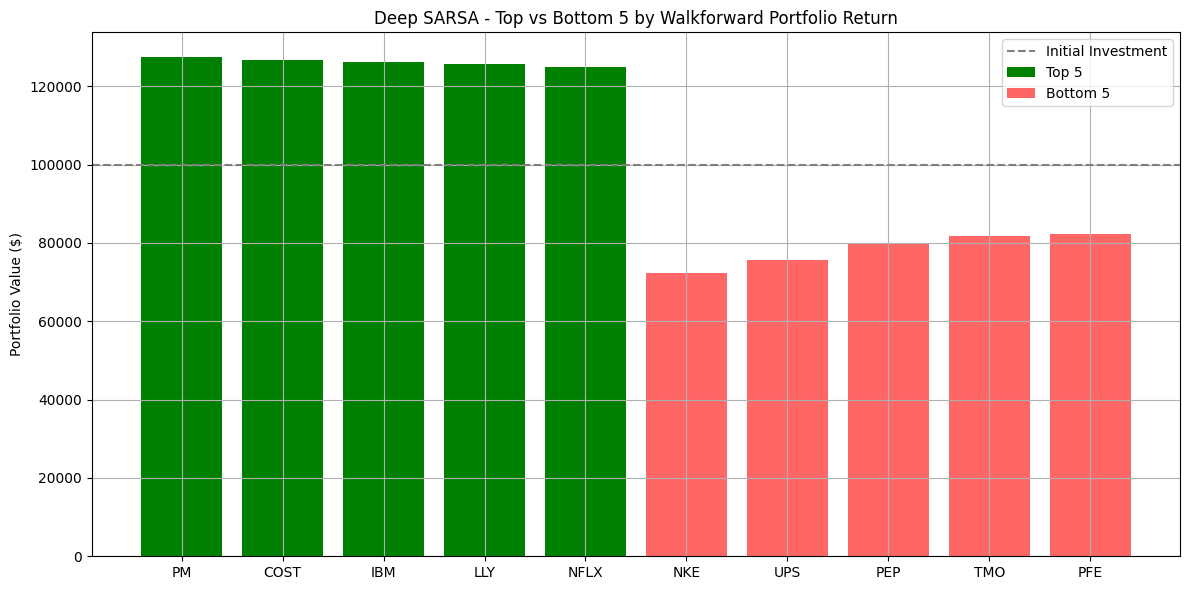

In [2]:
# ‚úÖ Imports
import os, gc, random
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from datetime import datetime
import matplotlib.pyplot as plt

# ‚úÖ Walkforward Utilities
def get_walkforward_splits(data, sequence_length, n_splits=3):
    total_len = len(data)
    fold_size = (total_len - sequence_length) // (n_splits + 1)
    splits = []
    for i in range(n_splits):
        train_start = 0
        train_end = sequence_length + fold_size * (i + 1)
        test_start = train_end
        test_end = test_start + fold_size
        if test_end > total_len:
            break
        splits.append((train_start, train_end, test_start, test_end))
    return splits

def train_agent_on_split(X, train_start, train_end, test_start, test_end, episodes=5):
    state_dim = X.shape[2]
    agent = DeepSARSAAgent(state_dim, 3)

    for ep in range(episodes):
        state_idx = random.randint(train_start, train_end - 2)
        state = torch.tensor(X[state_idx][None], dtype=torch.float32).to(device)
        action = agent.select_action(state, epsilon=1.0 - ep/episodes)

        for t in range(state_idx, train_end - 1):
            next_state = torch.tensor(X[t+1][None], dtype=torch.float32).to(device)
            reward = float(X[t+1, -1, 0] - X[t, -1, 0])
            done = t + 2 == train_end
            next_action = agent.select_action(next_state, epsilon=1.0 - ep/episodes)
            agent.update(state, action, reward, next_state, next_action, done)
            if done:
                break
            state, action = next_state, next_action

    test_rewards = []
    for t in range(test_start, test_end - 1):
        state = torch.tensor(X[t][None], dtype=torch.float32).to(device)
        action = agent.select_action(state, epsilon=0.0)
        next_state = torch.tensor(X[t+1][None], dtype=torch.float32).to(device)
        reward = float(X[t+1, -1, 0] - X[t, -1, 0])
        test_rewards.append(reward)

    return np.sum(test_rewards), agent

def walkforward_train_on_stock(ticker, episodes=5, n_splits=3):
    print(f"üìà Walkforward SARSA on {ticker}")
    df = yf.download(ticker, period="720d", interval="1h", progress=False)
    if df.empty:
        print(f"‚ö†Ô∏è No data for {ticker}, skipping.")
        return []

    df = compute_technical_indicators(df)
    features = ['Close', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'Signal_Line', 'ATR', 'OBV']
    df = df[features].copy()
    scaled = MinMaxScaler().fit_transform(df)

    X = []
    for i in range(SEQUENCE_LENGTH, len(scaled)):
        X.append(scaled[i-SEQUENCE_LENGTH:i])
    X = np.array(X)

    splits = get_walkforward_splits(X, SEQUENCE_LENGTH, n_splits=n_splits)
    fold_rewards = []

    for i, (tr_start, tr_end, te_start, te_end) in enumerate(splits):
        print(f"üîÅ Fold {i+1}: Train {tr_start}-{tr_end}, Test {te_start}-{te_end}")
        total_reward, agent = train_agent_on_split(X, tr_start, tr_end, te_start, te_end, episodes)
        fold_rewards.append(total_reward)
        model_path = f"{SAVE_DIR}/deep_sarsa_{ticker}_fold{i+1}.pth"
        torch.save(agent.model.state_dict(), model_path)
        print(f"‚úÖ Fold {i+1} Reward: {total_reward:.4f} | Saved: {model_path}")
        del agent
        gc.collect()
        torch.cuda.empty_cache()

    # ‚úÖ Final print and return are now correctly inside the function
    print(f"üéØ Rewards for {ticker}: {fold_rewards}")
    return fold_rewards

# ‚úÖ Run Walkforward for All Tickers
all_rewards = {}
for ticker in TICKERS:
    rewards = walkforward_train_on_stock(ticker, episodes=5, n_splits=3)
    all_rewards[ticker] = rewards
    gc.collect()
    torch.cuda.empty_cache()

# ‚úÖ Summary Plot
summary = []
initial_cash = 100000

for symbol, rewards in all_rewards.items():
    if len(rewards) == 0:
        continue
    avg_return = np.mean(rewards)
    final_value = initial_cash * (1 + avg_return)
    summary.append({"Symbol": symbol, "Avg Reward": avg_return, "Portfolio Value": final_value})

df_summary = pd.DataFrame(summary)
top5 = df_summary.sort_values(by="Portfolio Value", ascending=False).head(5)
bottom5 = df_summary.sort_values(by="Portfolio Value", ascending=True).head(5)

print("üìà Top 5 by Portfolio Value:")
print(top5)

print("\nüìâ Bottom 5 by Portfolio Value:")
print(bottom5)

plt.figure(figsize=(12, 6))
plt.bar(top5['Symbol'], top5['Portfolio Value'], color='green', label='Top 5')
plt.bar(bottom5['Symbol'], bottom5['Portfolio Value'], color='red', label='Bottom 5', alpha=0.6)
plt.axhline(initial_cash, linestyle='--', color='gray', label='Initial Investment')
plt.ylabel("Portfolio Value ($)")
plt.title("Deep SARSA - Top vs Bottom 5 by Walkforward Portfolio Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# ‚úÖ Save SARSA Summary to CSV
os.makedirs("results/sarsa_walkforward", exist_ok=True)
df_summary.to_csv("results/sarsa_walkforward/summary.csv", index=False)
print("\nüìÅ SARSA walkforward summary saved to results/sarsa_walkforward/summary.csv")
